In [1]:
import pandas as pd
df_sucio = pd.read_csv('totales_sin_limpiar.csv').drop_duplicates()
print(df_sucio.info())
df_sucio.head()

falsas = df_sucio[df_sucio.Target == 1].reset_index(drop=True)
verdaderas = df_sucio[df_sucio.Target == 0].reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6614 entries, 0 to 6784
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Periódico          6614 non-null   object
 1   Hipervínculo       6614 non-null   object
 2   Fecha publicación  6607 non-null   object
 3   Titular            6614 non-null   object
 4   Subtítulo          5422 non-null   object
 5   Cuerpo             6614 non-null   object
 6   Categoría          4983 non-null   object
 7   Target             6614 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 465.0+ KB
None


In [2]:
df_sucio[df_sucio.Cuerpo == 'NaN']
# no hay NaNs escritos como strings

,Periódico,Hipervínculo,Fecha publicación,Titular,Subtítulo,Cuerpo,Categoría,Target


In [3]:
import numpy as np

In [4]:
# sacamos el final de un par de noticias al azar de cada periodico y repetimos varias veces
# experimentamos con los datos para ver si hay algún patron muy claro en los finales que debamos eliminar

for p in ['ElDiario.es', 'ElMundo', 'El País']:
    
    i1 = np.random.randint(len(verdaderas[verdaderas.Periódico == p]))
    i2 = np.random.randint(len(verdaderas[verdaderas.Periódico == p]))
    
    print(verdaderas[verdaderas.Periódico == p].Cuerpo.iloc[i1][-700:], '\n')
    print(verdaderas[verdaderas.Periódico == p].Cuerpo.iloc[i2][-700:], '\n')

el Ministerio del Interior (Minint).Los integrantes de este grupo de migrantes cubanos habían participado en dos salidas ilegales de la isla, por la provincia central Ciego de Ávila.Con este vuelo, suman 90 las operaciones de retorno desde diferentes países en lo que va del año en curso, refiere la nota publicada por el Minint en Twitter.El pasado 6 e junio, el gobierno de Bahamas retornó a Cuba a otros tres migrantes ilegales como parte de los acuerdos migratorios entre los dos países.Aunque la mayor cantidad de migrantes irregulares cubanos deportados en esas operaciones proceden de Estados Unidos, también han sido retornado grupos desde Belice, Islas Caimán, República Dominicana y México. 

 de la vulnerabilidad”.Y ha criticado “cualquier estamento que atentara contra todo esto”.“Uno de los grandes hitos que he tenido, en este camino, ha sido tener un público que ha hecho suyas estas canciones hasta llenar y agotar recintos. Salas libres de violencia machista y espacios donde el col

In [5]:
el_pais = verdaderas[verdaderas.Periódico == 'El País'].reset_index(drop = True)

In [6]:
indices1 = el_pais.Cuerpo.str.find('suscríbete')
indices2 = el_pais.Cuerpo.str.find('suscríbase')

print(indices2.unique())
# parece que no aparece el "suscríbase"... pensaba que si

[-1]


In [7]:
minimos = np.minimum(indices1, indices2)
maximos = np.maximum(indices1, indices2)

indices = pd.Series(np.where((indices1 != -1) & (indices2 != -1), minimos, np.where((indices1 == -1) | (indices2 == -1), maximos, -1)))

In [8]:
# lista de indices con el menor indice de "indices1" e "indices2", para que si coinciden ambas palabras en una noticia (cosa que no sucede, pero bueno), se elimine desde la primera

In [9]:
indices

0         -1
1         -1
2       6158
3         -1
4         -1
        ... 
1943    6661
1944    7472
1945      -1
1946    5917
1947      -1
Length: 1948, dtype: int64

In [10]:
def slicer(df, string_to_find, col = 'Cuerpo'):
    
    indices = df[col].str.find(string_to_find)
    df[col] = df.apply(lambda x: x[col][:indices[x.name]], axis = 1)
    
    return df

In [11]:
len(el_pais.Cuerpo.iloc[1946])

5949

In [12]:
# el_pais['Cuerpo'] = el_pais.apply(lambda fila: fila['Cuerpo'][:indices[fila.name]], axis = 1)

slicer(el_pais, 'suscríbete')

# el 'apply' es a todo el dataframe "el_pais", luego especificamos axis = 1 para se aplique por filas
# en cada fila, se accede a la columna 'Cuerpo' y se hace slicing hasta el valor de la serie de indices que corresponde a esa fila

,Periódico,Hipervínculo,Fecha publicación,Titular,Subtítulo,Cuerpo,Categoría,Target
0,El País,https://elpais.com/espana/2022-10-19/el-pp-adm...,2022-10-19,El PP admite que el tono de Sánchez en el deba...,"“Se parece más a un presidente”, sostienen sob...",La negociación para renovar el Poder Judicial ...,espana,0
1,El País,https://elpais.com/deportes/2022-06-05/el-fond...,2022-06-05,El fondo del corazón de Rafa Nadal,"Cuando la cámara enfocaba a su entrenador, Car...",Lleva tantos años Rafa Nadal jugando la final ...,deportes,0
2,El País,https://elpais.com/cultura/2022-09-16/era-sexo...,2022-09-16,"“Era sexo, drogas y rock. Duró hasta los 50 añ...",Hoy se ha presentado en el festival de cine de...,Aparece en pantalla fumando. Mucho. También be...,cultura,0
3,El País,https://elpais.com/internacional/2022-08-01/en...,2022-08-01,En el frente de Jersón: “Necesitamos mucho más...,Militares en las zonas de combate del frente s...,Entre los deseos de un líder político y la rea...,internacional,0
4,El País,https://elpais.com/podcasts/hoy-en-el-pais/202...,2022-06-08,Ante la Selectividad: “Me equivoqué de carrera...,Un 34% de universitarios deja los estudios el ...,Créditos:Disponible en todas las plataformas d...,podcasts,0
...,...,...,...,...,...,...,...,...
1943,El País,https://elpais.com/internacional/2022-09-16/be...,2022-09-16,Berta Valle: “La represión de Daniel Ortega ha...,La activista y esposa del excandidato a la pre...,"Confinados en sus celdas, durmiendo en bancos ...",internacional,0
1944,El País,https://elpais.com/internacional/2022-06-12/me...,2022-06-12,Merkel rompe su silencio... y no se arrepiente...,La excanciller regresa a la vida pública tras ...,"“¿Le ha gustado nuestra conversación?”, le pre...",internacional,0
1945,El País,https://elpais.com/television/2022-06-15/el-se...,2022-06-15,El secreto de ‘Nadie sabe nada’ para conquista...,"Tras nueve años en antena en la SER y YouTube,...",Para entender la esencia del éxito de un fenóm...,television,0
1946,El País,https://elpais.com/television/2022-04-18/maste...,2022-04-18,"‘MasterChef’, ‘Supervivientes’ y ‘La Voz Kids’...",Formatos de probada eficacia vuelven a la prog...,"La primavera no solo altera la sangre, también...",television,0


In [13]:
len(el_pais.Cuerpo.iloc[1946])
# acorta en las que sale el "suscribete"

5917

In [14]:
el_diario = verdaderas[verdaderas.Periódico == 'ElDiario.es'].reset_index(drop = True)
indices = el_diario.Cuerpo.str.find('-----')
indices.unique()
# parece que hay 6 noticias donde aparecen los guiones

array([  -1, 4175, 5125, 9377, 7980, 7886, 3816], dtype=int64)

In [15]:
len(el_diario.Cuerpo.iloc[3])

4768

In [16]:
el_diario['Cuerpo'] = el_diario.apply(lambda fila: fila['Cuerpo'][:indices[fila.name]], axis = 1)

In [17]:
len(el_diario.Cuerpo.iloc[3])

4175

In [18]:
verdaderas_limpio = pd.concat([el_diario, verdaderas[verdaderas.Periódico == 'ElMundo'], el_pais]).reset_index(drop = True)

# Cuerpo de las noticias sin valores faltantes, habiendo eliminado las principales frases incómodas que aparecían al final. Sin duplicados.

In [19]:
# .to_csv('totales_limpias.csv', index = False)

In [20]:
for p in ['El Mundo Today', 'HayNoticia.es']:
    
    i1 = np.random.randint(len(falsas[falsas.Periódico == p]))
    i2 = np.random.randint(len(falsas[falsas.Periódico == p]))
    
    print(falsas[falsas.Periódico == p].Cuerpo.iloc[i1][-700:], '\n')
    print(falsas[falsas.Periódico == p].Cuerpo.iloc[i2][-700:], '\n')
    
# no veo ningun patron en las ultimas lineas de las noticias
# solo algunas noticias muy cortas, de unos 200 caracteres que voy a eliminar a continuacion

de ir pasando queso y souvenirs de la zona a sus compañeros del sector madrileño de la cola también ha apuntado que la experiencia que adquieran en el extranjero seguro que les beneficia a la hora de encontrar un puesto de trabajo aunque la cola de la oficina de la calle santa leonor es la más extensa y aparatosa de las que ha generado el paro en españa, el ministerio de trabajo ha reconocido que la más preocupante es la de la oficina del inem de barbate (cádiz). los parados están ya en el mar y muchos marroquíes esperan ansiosos a que alcancen el estrecho para meterse también en la cola con la esperanza de entrar en nuestro país y, si puede ser, con un trabajo estable , explica un portavoz. 

, lamenta uno de los viajeros de renfe y del tiempo. los viajeros del pasado han intentado tranquilizar sin éxito a sus versiones del futuro, que llevan mucho más tiempo esperando que ellos y, por tanto, disponen de menos paciencia y están más irritados. los momentos de mayor tensión se han produ

# Análisis de la longitud de las noticias (Cuerpo)

In [21]:
v, f = verdaderas.Cuerpo.str.len().mean(), falsas.Cuerpo.str.len().mean()
print(f'longitud media verdaderas: {v} \nlongitud media falsas: {f} \nratio v/f: {v/f}')

longitud media verdaderas: 6335.020735620835 
longitud media falsas: 1518.5793991416308 
ratio v/f: 4.171675672145739


In [22]:
import seaborn as sns
from matplotlib import pyplot as plt

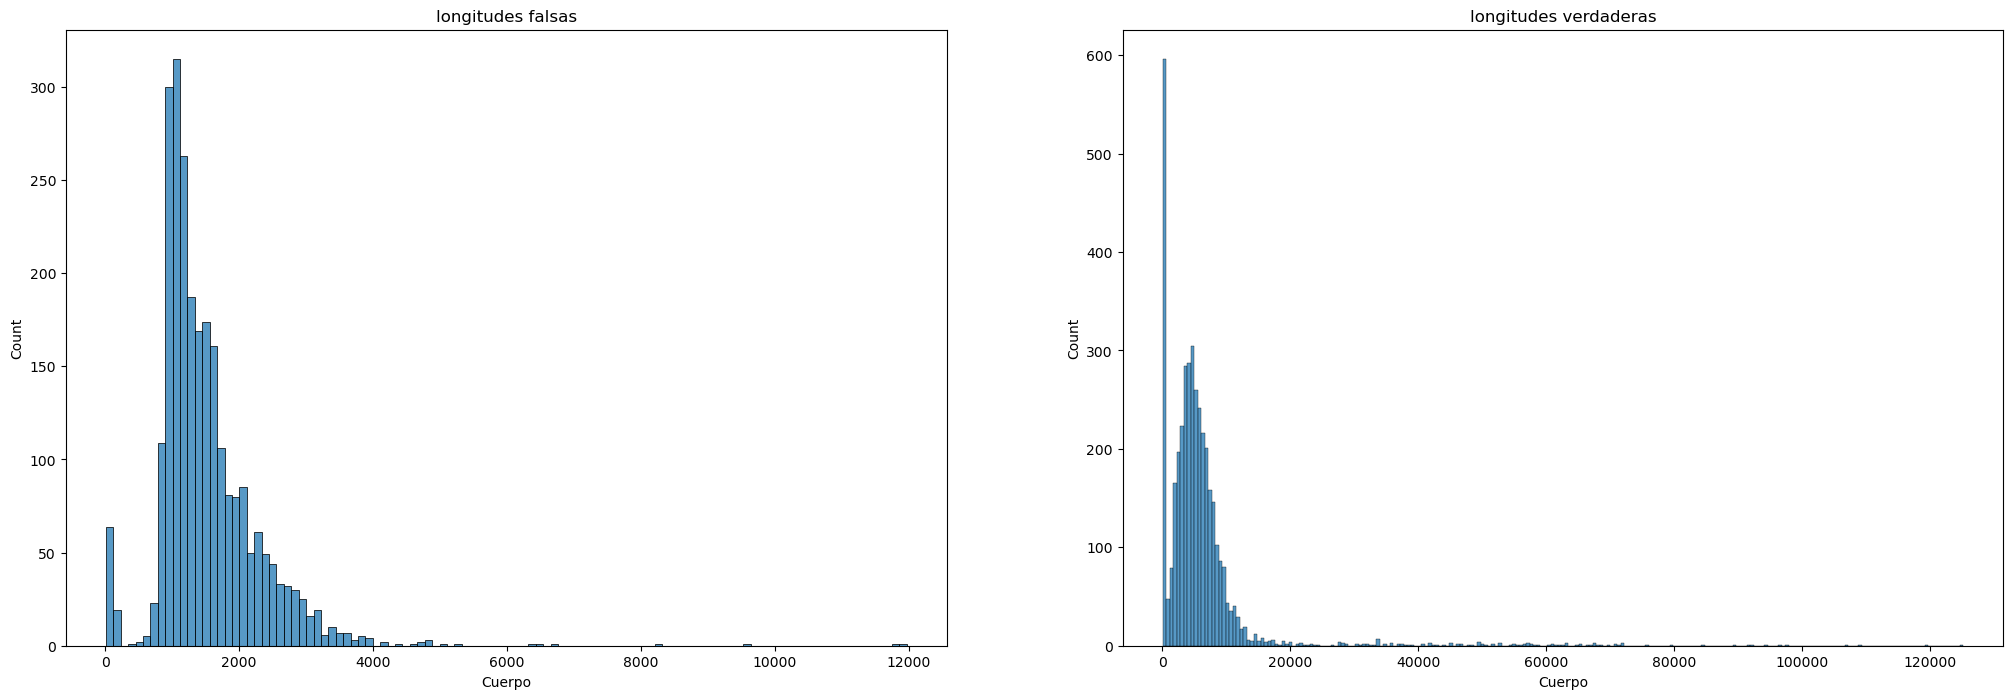

In [23]:
long_v = verdaderas.Cuerpo.str.len()
long_f = falsas.Cuerpo.str.len()

figure, axis = plt.subplots(1, 2, figsize=(25, 8))

sns.histplot(long_f, ax = axis[0])
axis[0].set_title('longitudes falsas')

sns.histplot(long_v, ax = axis[1])
axis[1].set_title('longitudes verdaderas')

plt.show()

In [24]:
print('Algunos datos sobre longitudes de Falsas y Verdaderas \n')
print('Por encima de los 4000 caracteres: ', (long_f[long_f > 4000].count(), long_v[long_v < 4000].count()))
print('En proporciones: ', (21/len(long_f), 2479/len(long_v)))
print('Coeficientes de variación: ', (long_f.std()/long_f.mean() , long_v.std()/long_v.mean()))

Algunos datos sobre longitudes de Falsas y Verdaderas 

Por encima de los 4000 caracteres:  (18, 1629)
En proporciones:  (0.008193523214982443, 0.6119476672426561)
Coeficientes de variación:  (0.5199134145880905, 1.505305876682012)


### Aunque no se aprecie tanto en los histogramas, la distribución de las longitudes de las noticias verdaderas presenta mucha mayor asimetría y dispersión.
#### 60% de las verdaderas por encima de los 4000 caracteres, mientras que ni el 1% de las falsas lo hacen
#### También se observa mucha mayor dispersión en las longitudes de las verdaderas

### Eliminando noticias por encima de cierto valor:
#### - Cantidades más similares de un tipo y otro
#### - Longitudes medias mas parecidas
#### - Menor asimetría en la distribución de las longitudes de las verdaderas
#### - Menor diferencia en la dispersion de ambas longitudes

In [25]:
totales = pd.concat([verdaderas_limpio, falsas]).reset_index(drop = True)

In [26]:
descartadas = totales[((totales.Cuerpo.str.len() < 200) == True) | ((totales.Cuerpo.str.len() > 6000) == True)]

In [27]:
totales_limpio = totales.drop(descartadas.index).reset_index(drop=True)
print(len(totales_limpio[totales_limpio.Target == 0]))
print(len(totales_limpio[totales_limpio.Target == 1]))

2615
2473


## Repito el analisis tras la limpieza

In [28]:
verdaderas = totales_limpio[totales_limpio.Target == 0]
falsas = totales_limpio[totales_limpio.Target == 1]

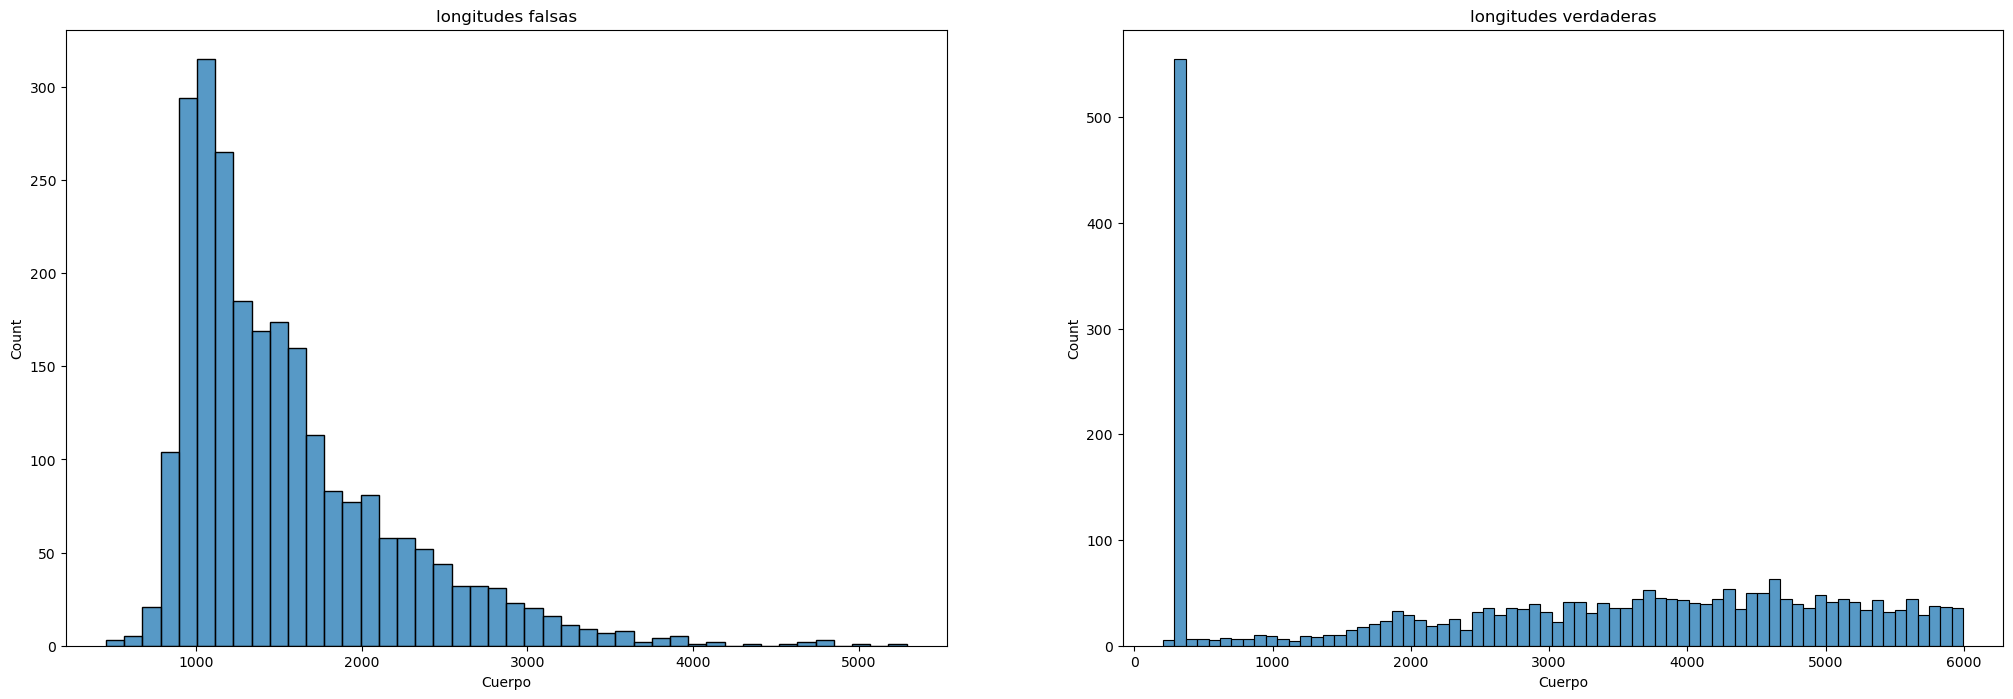

In [29]:
long_v = verdaderas.Cuerpo.str.len()
long_f = falsas.Cuerpo.str.len()

figure, axis = plt.subplots(1, 2, figsize=(25, 8))

sns.histplot(long_f, ax = axis[0])
axis[0].set_title('longitudes falsas')

sns.histplot(long_v, ax = axis[1], bins = 70)
axis[1].set_title('longitudes verdaderas')

plt.show()

# se observa algo raro en las noticias verdaderas de una longitud aproximada de 400
# tantas con una longitud tan concreta indica que probablemente formen algun tipo de grupo con características comunes

In [30]:
# VEAMOS DE FORMA ALEATORIA UNAS CUANTAS

cortas = verdaderas[(verdaderas.Cuerpo.str.len() < 500) == True].reset_index(drop = True)

i = np.random.randint(len(cortas))
print(len(cortas.Cuerpo.iloc[i]))
cortas.Cuerpo.iloc[i]

362


'El Foreign Office le ordenó salir de Ucrania apenas un día antes de que comenzara la invasión. El periodista freelance y escritor Paul Mason (Leigh, Reino Unido, 62 años) se encontraba en Kiev acompañando a una delegación política. «Nos dijeron que lHazte Premium desde 1€ el primer mes Aprovecha esta oferta por tiempo limitado y accede a todo el contenido web\n'

In [55]:
# en la mayoría se repite al final el mensaje "Hazte Premium desde 1€ el primer mes Aprovecha esta oferta por tiempo limitado y accede a todo el contenido web\n"
# habia pensado eliminarlas directamete pero son mas de 560, me parecen muchas

#  * * * *  ACTUALIZACION: FINALMENTE LAS BORRAMOS 
#  POR LO QUE LAS CELDAS SIGUIENTES A LA PROXIMA QUEDAN SIMPLEMENTE COMENTADAS  * * * * 

In [32]:
descartar = verdaderas[(verdaderas.Cuerpo.str.len() < 500) == True].index
# se podria afinar un poco mas para tirar justo las que tengan ese formato, pero tampoco mucho (ver celda siguiente)

verdaderas = verdaderas.drop(descartar).reset_index(drop = True)

In [31]:
# indices = cortas.Cuerpo.str.find('Hazte Premium')
# print(f'Aparece en {(indices != -1).sum()} noticias de las {len(cortas)} que estamos analizando')

Aparece en 553 noticias de las 569 que estamos analizando


In [32]:
# indices

# es raro que el "Hazte Premium..." empiece tantas veces en el mismo punto

0      250
1      250
2      250
3      250
4      250
      ... 
564    250
565    250
566     -1
567     -1
568     -1
Name: Cuerpo, Length: 569, dtype: int64

In [33]:
# cortas.Cuerpo[:7]

# Sin embargo sí parecen distintas

0    Estos días se cumple un año desde que Araceli ...
1    Hace algo más de 14 años que el Ibex 35 conqui...
2    Hoy reposan en las calles como un elemento más...
3    Cuando Ismael Clemente empezó a frecuentar los...
4    La continuidad del Instituto Nacional Electora...
5    Al final no fue para tanto, sino todo un éxito...
6    Cuando a principios del siglo pasado la nueva ...
Name: Cuerpo, dtype: object

In [34]:
# print(len(cortas.Cuerpo.iloc[0]))
# cortas['Cuerpo'] = cortas.apply(lambda fila: fila['Cuerpo'][:indices[fila.name]], axis = 1)
# print(len(cortas.Cuerpo.iloc[0]))

362
250


In [35]:
# indices_cortas = verdaderas[(verdaderas.Cuerpo.str.len() < 500) == True].index
# verdaderas = pd.concat([verdaderas.drop(indices_cortas).reset_index(drop = True), cortas]).reset_index(drop = True)

#  ya limpio del todo

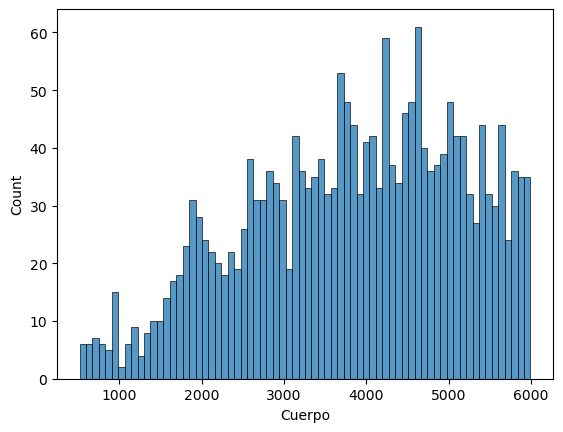

In [34]:
long_v = verdaderas.Cuerpo.str.len()
sns.histplot(long_v, bins = 70)
plt.show()

#  * * * * LA DISTRIBUCIÓN DE LAS LONGITUDES DE LAS VERDADERAS YA TIENE OTRO ASPECTO ! * * * * 

In [35]:
totales_limpisimo = pd.concat([verdaderas, falsas]).reset_index(drop = True)

In [36]:
#  * * * *  ACTUALIZACION: QUITO LOS CEROS  * * * * 

eliminar = ['000', '00']
totales_limpisimo['Cuerpo'] = totales_limpisimo['Cuerpo'].replace(eliminar, '', regex=True)

In [37]:
totales_limpisimo.loc[:, 'Cuerpo'] = totales_limpisimo.Cuerpo.str.lower()
totales_limpisimo.loc[:, 'Subtítulo'] = totales_limpisimo.Subtítulo.str.lower()
totales_limpisimo.loc[:, 'Titular'] = totales_limpisimo.Titular.str.lower()

In [54]:
# totales_limpisimo.to_csv('dataset_final.csv', index = False)

#  * * * * GUARDO EL ACTUALIZADO * * * *
totales_limpisimo.to_csv('dataset_final_actualizacion1.csv', index = False)

In [39]:
totales_limpisimo

,Periódico,Hipervínculo,Fecha publicación,Titular,Subtítulo,Cuerpo,Categoría,Target
0,ElDiario.es,https://www.eldiario.es/politica/pp-recupera-l...,2023-07-11,el pp se recupera ligeramente pero sigue sin o...,la estimación de escaños no se mueve en la enc...,el partido popular se recupera muy ligeramente...,politica,0
1,ElDiario.es,https://www.eldiario.es/politica/58-ciudadanos...,2023-07-11,un 58% de los ciudadanos critican los pactos c...,"el 17,8% de quienes apuestan por feijóo ven “m...",el pp ha necesitado a vox para recuperar buena...,politica,0
2,ElDiario.es,https://www.eldiario.es/politica/diputado-ayus...,2023-07-11,un diputado de ayuso reúne a un grupo de vícti...,daniel portero trata con urgencia de contrarre...,el diputado del pp en la asamblea de madrid da...,politica,0
3,ElDiario.es,https://www.eldiario.es/andalucia/almeria/psoe...,2023-07-11,el psoe de mójacar recurre ante el constitucio...,"ya con nuevo alcalde del pp, los socialistas r...",mojácar retomó el ritmo político con la procla...,andalucia,0
4,ElDiario.es,https://www.eldiario.es/castilla-la-mancha/pol...,2023-07-11,la exalcaldesa de toledo pide a feijóo que fir...,"la socialista, también número dos al congreso,...",la exalcaldesa de toledo y 'número dos' de la ...,castilla-la-mancha,0
...,...,...,...,...,...,...,...,...
4514,HayNoticia.es,https://haynoticia.es/una-empresa-catalana-tri...,2018-11-06,una empresa catalana triunfa con su papel higi...,NaN,la empresa catalana banys nous de barcelona es...,curiosidades,1
4515,HayNoticia.es,https://haynoticia.es/hospitalizado-tras-inten...,2018-10-31,hospitalizado tras intentar sacarse una muela ...,NaN,sucedió el pasado lunes poco después de las 20...,curiosidades,1
4516,HayNoticia.es,https://haynoticia.es/lleva-300-bolsas-de-plas...,2018-10-30,lleva 300 bolsas de plástico a mercadona para ...,NaN,un joven ha sido noticia ayer tras presentarse...,curiosidades,1
4517,HayNoticia.es,https://haynoticia.es/la-dgt-multara-a-los-con...,2018-10-28,la dgt multará a los conductores que no hayan ...,NaN,este domingo nos ha tocado hacer por segunda v...,curiosidades,1


# Análisis de palabras más frecuentes

In [2]:
#  * * * * en estas líneas habia codigo que era redundante con lo posterior 

In [3]:
#   lo borro para que esté todo mas claro * * * * 

In [44]:
from collections import Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

stopwords = stopwords.words('spanish')

f_cuerpos = falsas.Cuerpo.values
vectorizer1 = CountVectorizer(stop_words = stopwords + ['si', 'según', 'tras'])
vectorizer1.fit(f_cuerpos)
f_vect = vectorizer1.transform(f_cuerpos)
palabras1 = vectorizer1.get_feature_names_out()

In [45]:
frecuencias_fal = f_vect.sum(axis=0)
frecuencias_fal = np.asarray(frecuencias_fal).ravel()

contador_fal = Counter(dict(zip(palabras1, frecuencias_fal)))

# Filtrar stopwords y palabras de longitud 1
mas_frec_fal = [(palabra, frecuencia) for palabra, frecuencia in contador_fal.most_common(10) if palabra not in stopwords and len(palabra) > 1]

In [46]:
frecuencias_fal = [frecuencia for _, frecuencia in mas_frec_fal]
palabras_fal = [palabra for palabra, _ in mas_frec_fal]

In [47]:
print(palabras_fal) 
print(frecuencias_fal)

['años', 'ser', 'ahora', 'así', 'sido', 'mañana', 'vez', 'dos', 'aunque', 'casa']
[1138, 1084, 937, 876, 824, 777, 765, 760, 721, 716]


In [48]:
# ahora vemos las frecuencias de las verdaderas:

In [49]:
v_cuerpos = verdaderas.Cuerpo.values
vectorizer2 = CountVectorizer(stop_words = stopwords + ['si', 'según', 'tras'])
vectorizer2.fit(v_cuerpos)
v_vect = vectorizer2.transform(v_cuerpos)
palabras2 = vectorizer2.get_feature_names_out()

In [50]:
frecuencias_ver = v_vect.sum(axis=0)
frecuencias_ver = np.asarray(frecuencias_ver).ravel()

contador_ver = Counter(dict(zip(palabras2, frecuencias_ver)))

# Filtrar stopwords y palabras de longitud 1
mas_frec_ver = [(palabra, frecuencia) for palabra, frecuencia in contador_ver.most_common(10) if palabra not in stopwords and len(palabra) > 1]

In [51]:
frecuencias_ver = [frecuencia for _, frecuencia in mas_frec_ver]
palabras_ver = [palabra for palabra, _ in mas_frec_ver]

In [52]:
print(palabras_ver) 
print(frecuencias_ver)

['años', 'dos', 'ser', 'año', 'país', 'después', 'ahora', 'parte', 'sido', 'madrid']
[2914, 2379, 1660, 1543, 1539, 1437, 1423, 1408, 1331, 1322]


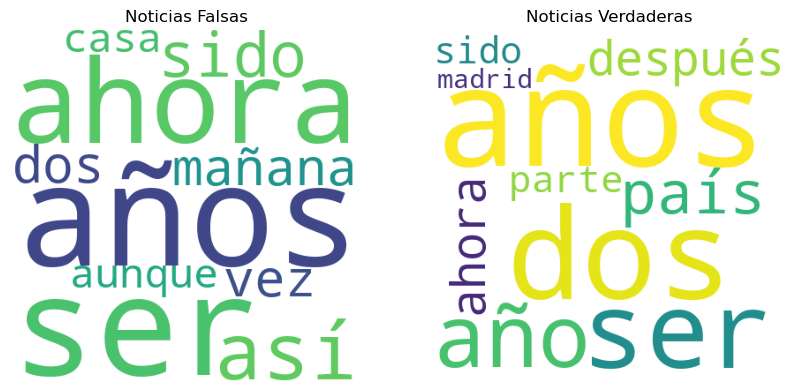

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_fal = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(zip(palabras_fal, frecuencias_fal)))
wordcloud_ver = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(zip(palabras_ver, frecuencias_ver)))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(wordcloud_fal)
axes[0].set_title('Noticias Falsas')
axes[0].axis('off')

axes[1].imshow(wordcloud_ver)
axes[1].set_title('Noticias Verdaderas')
axes[1].axis('off')

plt.show()